# Introducción al aprendizaje automatizado - TP final
## Autora: Aldana Zarate
### Ejercicio 1

In [2]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import datasets, layers, models

#from google.colab import files

In [3]:
# Funciones auxiliares a usar en los 3 ejercicios

def graficar_curvas_error(train_error, val_error, title):
    n = list(range(1, len(train_error) + 1))
    plt.plot(n, train_error, label = 'Train error')
    plt.plot(n, val_error, label = 'Validation error')
    plt.xlabel('Epoca')
    plt.ylabel('Error')
    plt.legend()
    plt.title(title)
    plt.show()

def get_train_val_errors(history):
    train_error = list(map(lambda x: 1 - x, history.history['accuracy']))
    val_error = list(map(lambda x: 1 - x, history.history['val_accuracy']))

    return train_error, val_error

def get_test_error(model):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    test_loss, test_acc = model.evaluate(test_images,  test_labels)
    return 1 - test_acc

def save_metrics_to_csv(epocas, train_error, val_error, csv_name):
    datos_errores = {'Epoca': epocas, 'Train error': train_error, 'Val error': val_error}

    df = pd.DataFrame(datos_errores)
    df.to_csv(csv_name)
    files.download(csv_name)

def save_test_error_to_csv(test_error, csv_name):
    error_test = {'Error test': [test_error]}

    df = pd.DataFrame(error_test)
    df.to_csv(csv_name)
    files.download(csv_name)

In [4]:
def ej1(model, epocas):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Partimos el conjunto de train para obtener el de validacion
    train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
    )

    # Compilamos el modelo
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    # Entrenamos el modelo
    history = model.fit(
      train_images, 
      train_labels, 
      epochs=epocas, 
      validation_data=(val_images, val_labels)
    )

    return history, model

In [ ]:
# Procedemos a crear la base convolucional para este ejercicio
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(128))
model1.add(layers.Dense(128))
model1.add(layers.Dense(10))

history_ej1, model_ej1 = ej1(model1, 10)

train_error_ej1, val_error_ej1 = get_train_val_errors(history_ej1)
test_error_ej1 = get_test_error(model_ej1)

save_metrics_to_csv(list(range(1, len(train_error_ej1) + 1)), train_error_ej1, val_error_ej1, 'errores_ej_1.csv')
save_test_error_to_csv(test_error_ej1, 'test_error_ej1.csv')


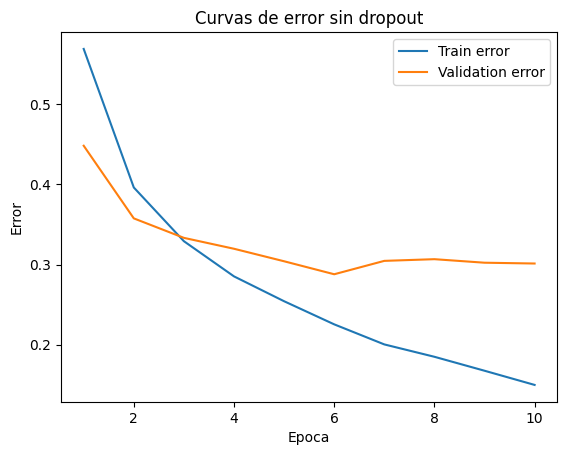

Error de test:  0    0.3089
Name: Error test, dtype: float64


In [12]:
# Analisis datos ej 1
datos_errores = pd.read_csv('metrics/errores_ej_1.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error sin dropout')
error_test = pd.read_csv('metrics/test_error_ej1.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Podemos observar un error de test del 0.30, lo cual es poco aceptable. Además, a partir de la época 3 la curva de validación empieza a separarse de la de train, haciéndose esta separación cada vez más grande hasta la última época, mostrando un claro sobreajuste.

# Ejercicio 2

In [ ]:
for (p1,p2) in [(0.2,0), (0.5, 0) , (0.2, 0.2), (0.5, 0.2), (0.2, 0.5), (0.5, 0.5)]:
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    if p1 > 0:
        model2.add(layers.Dropout(p1, input_shape=(32, 32, 3)))
    model2.add(layers.Flatten())
    model2.add(layers.Dense(64))
    if p2 > 0:
        model2.add(layers.Dropout(p2, input_shape=(32, 32, 3)))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(10))

    history_ej2, model_ej2 = ej1(model2, 20)
    train_error_ej2, val_error_ej2 = get_train_val_errors(history_ej2)
    test_error_ej2 = get_test_error(model_ej2)

    save_metrics_to_csv(list(range(1, len(train_error_ej2) + 1)), train_error_ej2, val_error_ej2, 'errores_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    save_test_error_to_csv(test_error_ej2, 'error_test_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')

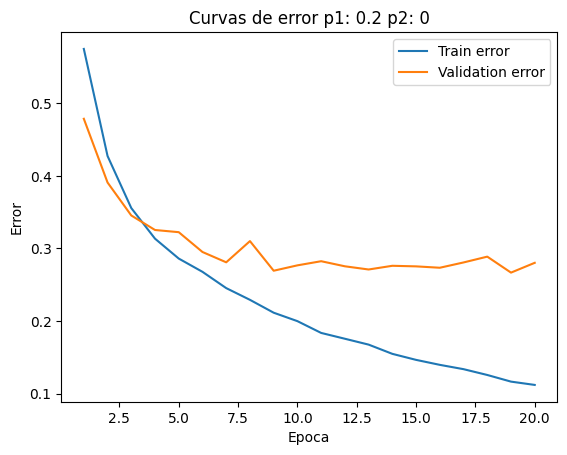

Error de test:  0    0.2931
Name: Error test, dtype: float64


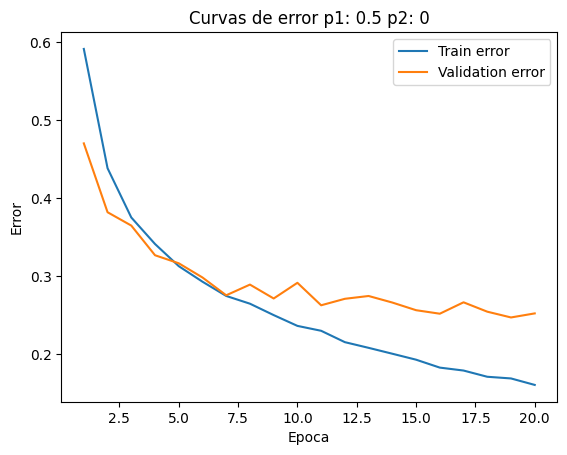

Error de test:  0    0.2609
Name: Error test, dtype: float64


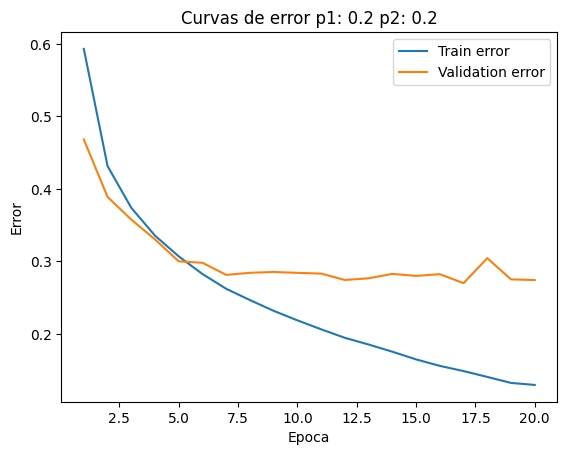

Error de test:  0    0.2826
Name: Error test, dtype: float64


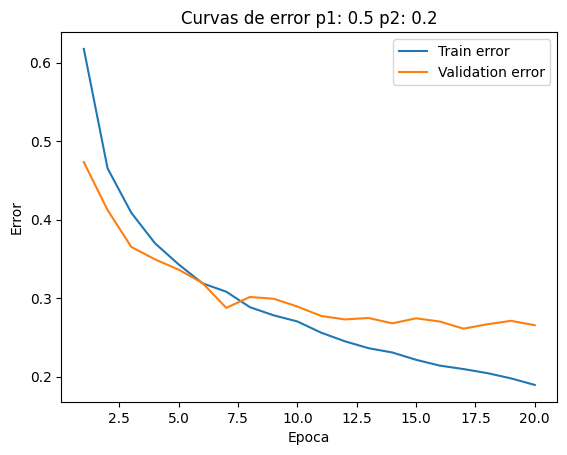

Error de test:  0    0.2725
Name: Error test, dtype: float64


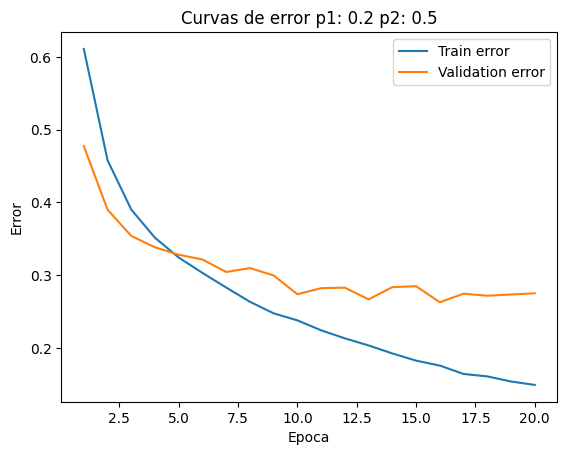

Error de test:  0    0.2871
Name: Error test, dtype: float64


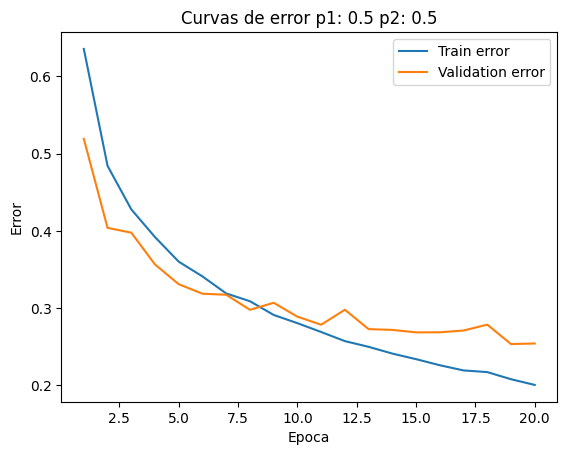

Error de test:  0    0.268
Name: Error test, dtype: float64


In [11]:
# Análisis datos ej 2
for (p1,p2) in [(0.2,0), (0.5, 0) , (0.2, 0.2), (0.5, 0.2), (0.2, 0.5), (0.5, 0.5)]:
    datos_errores = pd.read_csv('metrics/errores_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
    graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error p1: '+str(p1)+' p2: '+str(p2))
    error_test = pd.read_csv('metrics/error_test_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    error_test = error_test.drop('Unnamed: 0', axis=1)
    print('Error de test: ', error_test['Error test'])

Podemos observar que en todos los casos sigue habiendo sobreajuste, pero sí se puede ver que en algunos casos mejora de manera más notable que otros, y que todos los casos con dropout tienen mejor rendimiento que el diseño de la red del ejercicio 1. Los peores casos tanto de sobreajuste como de error de testing se observan cuando se usa un primer dropout del 0.2. Para los otros 3 casos con un primer dropout del 0.5, se nota una mejor atenuación del sobreajuste. Con lo cual, tomando en cuenta quien mejoró más la situación de sobreajuste y el error de testing, el dropout óptimo sería de p1 y p2 igual a 0.5.

# Ejercicio 3

In [ ]:
# Dropout óptimo: p1: 0.5 p2: 0.5

img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

model3 = models.Sequential()
model3.add(data_augmentation)
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model3.add(layers.Dense(128))
model3.add(layers.Dense(128))
model3.add(layers.Dense(10))

history_ej3, model_ej3 = ej1(model3, 20)
train_error_ej3, val_error_ej3 = get_train_val_errors(history_ej3)
test_error_ej3 = get_test_error(model_ej3)

save_metrics_to_csv(list(range(1, len(train_error_ej3) + 1)), train_error_ej3, val_error_ej3, 'errores_ej3.csv')
save_test_error_to_csv(test_error_ej3, 'error_test_ej3.csv')

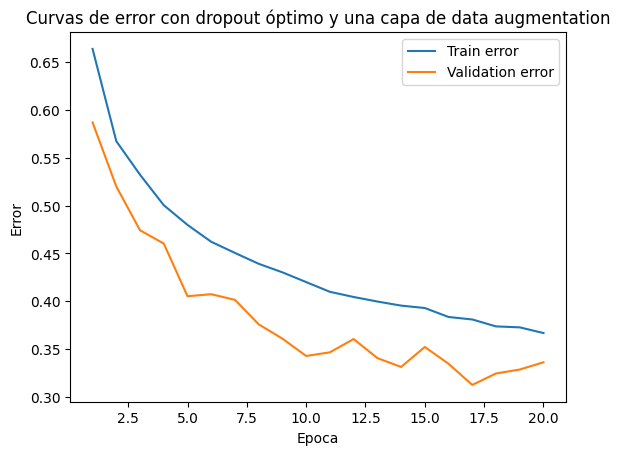

Error de test:  0    0.345
Name: Error test, dtype: float64


In [13]:
#Análisis ej3
datos_errores = pd.read_csv('metrics/errores_ej3.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con dropout óptimo y una capa de data augmentation')
error_test = pd.read_csv('metrics/error_test_ej3.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Se puede observar en la gráfica que en este caso si hay menos sobreajuste, ya que las curvas avanzan de manera más similar. Además, ahora la curva de error de validation de hecho nunca sobrepasa a la de error de train; se mantiene siempre abajo (con varios picosa diferencia de la de train) pero siempre abajo (a diferencia de los modelos anteriores donde a partir de una cierta época el error de train se elevaba y el de train descendía, mostrando sobreajuste). Sin embargo, el error de test aumentó notablemente. El peor caso hasta el momento había sido para la red original del ejercicio 1 con un 0.30 de error, y en este caso se obtuvo un 0.34, un 4% más. Con lo cual, la capa de data augmentation colaboró para mejorar el sobreajuste pero empeoró el error.

# Ejercicio 4

Al ser un problema muy presente el sobreajuste sobre todos los modelos, se me ocurre seguir utilizando técnicas de regularización sobre el modelo. La combinación del dropout óptimo obtenido en el ejercicio 2 + data augmentation no dio muy buenos resultados ya que si bien colaboró en disminuir el sobreajuste, hizo que creciera el error. Así que voy a proceder por probar con más capas de dropout en capas un poco menos profundas del modelo, ya que en el ejercicio 2 estas comienzan a estar recién en una profundidad bastante considerable. Procedo por probar valores pequeños al principio para que no regularice tanto en esta instancia tampoco.

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Dense(128))
model4.add(layers.Dense(128))
model4.add(layers.Dense(10))

history_ej4, model_ej4 = ej1(model4, 20)
train_error_ej4, val_error_ej4 = get_train_val_errors(history_ej4)
test_error_ej4 = get_test_error(model_ej4)

save_metrics_to_csv(list(range(1, len(train_error_ej4) + 1)), train_error_ej4, val_error_ej4, 'errores_ej4.csv')
save_test_error_to_csv(test_error_ej4, 'error_test_ej4.csv')

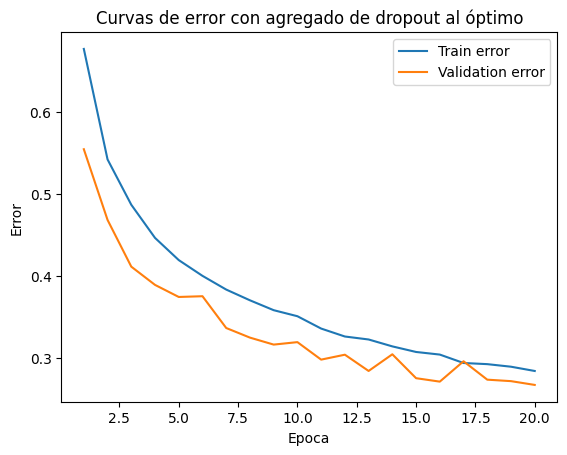

Error de test:  0    0.2678
Name: Error test, dtype: float64


In [14]:
# Análisis datos ej4
datos_errores = pd.read_csv('metrics/errores_ej4.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con agregado de dropout al óptimo')
error_test = pd.read_csv('metrics/error_test_ej4.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Podemos observar que mejoró muchisímo la situación del sobreajuste ya que las curvas evolucionan de manera similar, la curva de validación se mantiene siempre debajo de la de train y van decreciendo. Por el lado del error, se mantuvo el mejor error obtenido hasta ahora, 0.268. Es decir, no empeoró pero tampoco se consiguió una mejora. Algo muy importante a tener en cuenta es que para esta ejecución, le dejé 20 épocas para el modelo como se utilizó en el ejercicio 2, pero, como se agregó dropout, hubiera sido recomendable duplicar las épocas de entrenamiento a 40 para que el azar no impacte tanto. 
Viendo como van decreciendo las curvas a medida que aumentan las épocas, tendría sentido que si hacemos este incremento en las épocas de entrenamiento, ahí sí logremos una mejora importante en el error. (*)

Otro approach para mantener la cantidad de épocas y ver si se se puede mejorar el resultado: procedemos a eliminar los dropouts y pasamos a agregar dos capas convolucionales de 128 filtros para ver si con esto podemos mejorar la accuracy. También agregamos una más de 32 y un maxpool luego de las capas nuevas para acercanos un poco más a una VGG.

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Dense(128))
model4.add(layers.Dense(128))
model4.add(layers.Dense(10))

history_ej4, model_ej4 = ej1(model4, 20)
train_error_ej4, val_error_ej4 = get_train_val_errors(history_ej4)
test_error_ej4 = get_test_error(model_ej4)

save_metrics_to_csv(list(range(1, len(train_error_ej4) + 1)), train_error_ej4, val_error_ej4, 'errores_ej4_v2.csv')
save_test_error_to_csv(test_error_ej4, 'error_test_ej4_v2.csv')

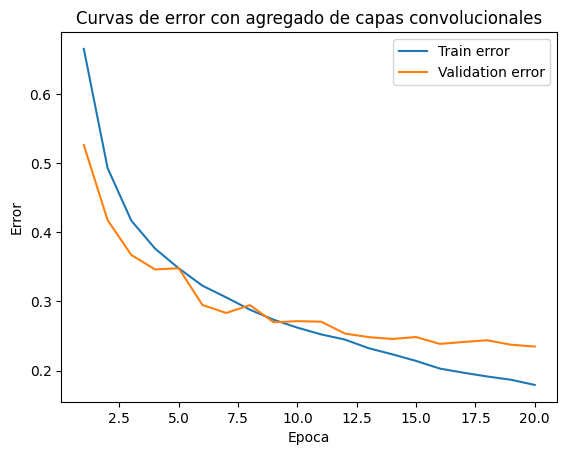

Error de test:  0    0.2314
Name: Error test, dtype: float64


In [15]:
# Análisis de datos de la versión 2 mejorada, se obtuvo un 3% de mejora en el error de test
datos_errores = pd.read_csv('metrics/errores_ej4_v2.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con agregado de capas convolucionales')
error_test = pd.read_csv('metrics/error_test_ej4_v2.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

En este caso, se puede ver en las gráficas un poco de sobreajuste, sobretodo en las últimas épocas comenzando a partir de la época 13 aproximadamente. En este modelo sí se obtuvo una mejora en el error de test, pasando de 0.268 a 0.231, alcanzando un 3%. El diseño para este dataset mejoró los resultados ya que tenemos un modelo más complejo con más filtros, logrando extraer más características del mismo. Sin embargo, no quiero decir que esto sea una implicancia ya que ya sea por el tamaño del dataset o lo que fuere, se sigue observando un leve sobreajuste que es para tenerlo en cuenta al ir con este approach.

## (*) Anexo: Dropouts con más épocas

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Dense(128))
model4.add(layers.Dense(128))
model4.add(layers.Dense(10))

history_ej4, model_ej4 = ej1(model4, 40)
train_error_ej4, val_error_ej4 = get_train_val_errors(history_ej4)
test_error_ej4 = get_test_error(model_ej4)

save_metrics_to_csv(list(range(1, len(train_error_ej4) + 1)), train_error_ej4, val_error_ej4, 'errores_ej4_v1.2.csv')
save_test_error_to_csv(test_error_ej4, 'error_test_ej4_v1.2.csv')

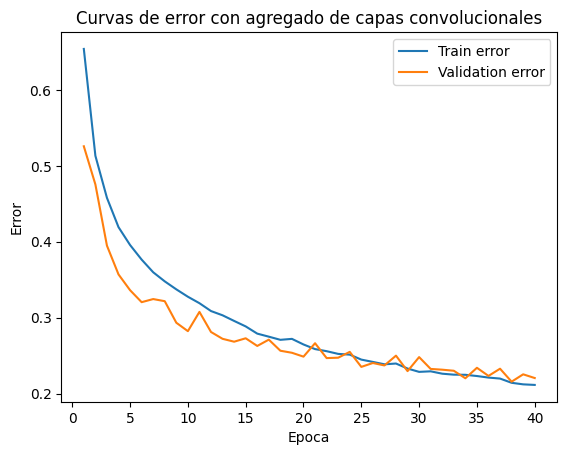

Error de test:  0    0.2347
Name: Error test, dtype: float64


In [18]:
# Análisis de datos de la versión 2 mejorada, se obtuvo un 3% de mejora en el error de test
datos_errores = pd.read_csv('metrics/errores_ej4_v1.2.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con agregado de capas convolucionales')
error_test = pd.read_csv('metrics/error_test_ej4_v1.2.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Efectivamente duplicando la cantidad de épocas se consigue una mejora en el error, aunque también es solo del 3%. Pero, el costo del doble de epocas de entrenamiento viene con el beneficio de que no hay sobreajuste.

# Ejercicio 5

In [ ]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
          layers.RandomBrightness(factor=0.2)
     ]
)

model5 = models.Sequential()
model5.add(data_augmentation)
model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Flatten())
model5.add(layers.Dense(64))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Dense(128))
model5.add(layers.Dense(128))
model5.add(layers.Dense(10))

history_ej5, model_ej5 = ej1(model5, 20)
train_error_ej5, val_error_ej5 = get_train_val_errors(history_ej5)
test_error_ej5 = get_test_error(model_ej5)

save_metrics_to_csv(list(range(1, len(train_error_ej5) + 1)), train_error_ej5, val_error_ej5, 'errores_ej5.csv')
save_test_error_to_csv(test_error_ej5, 'error_test_ej5.csv')

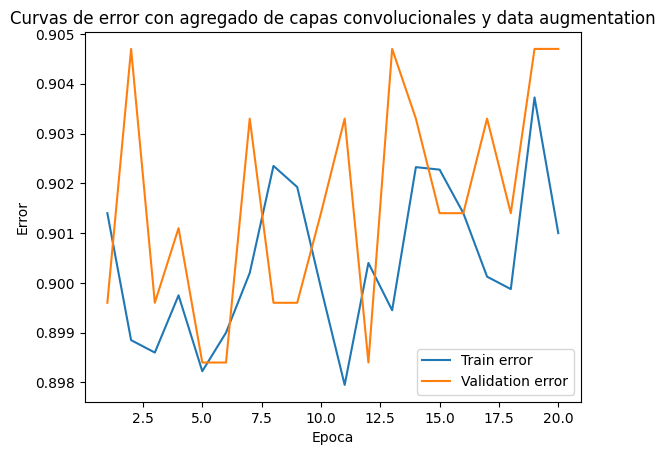

Error de test:  0    0.9
Name: Error test, dtype: float64


In [16]:
# Análisis datos ej5
datos_errores = pd.read_csv('metrics/errores_ej5.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con agregado de capas convolucionales y data augmentation')
error_test = pd.read_csv('metrics/error_test_ej5.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Este modelo resultó ser sumamente poco útil. El eje del error se mueve muy poco alredor de un 0.9, lo cual claramente es muchísimo. No sé si tiene mucho sentido comentar esta gráfica; no sé si el factor 0.2 para el brillo fue muy drástico o si pasó algo extraño en la ejecución, pero descarto completamente este modelo.

Pasamos a probar con la operación de contraste para ver si obtenemos mejores resultados:

In [ ]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
          layers.RandomContrast(0.1),
     ]
)

model5 = models.Sequential()
model5.add(data_augmentation)
model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Flatten())
model5.add(layers.Dense(64))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Dense(128))
model5.add(layers.Dense(128))
model5.add(layers.Dense(10))

history_ej5, model_ej5 = ej1(model5, 20)
train_error_ej5, val_error_ej5 = get_train_val_errors(history_ej5)
test_error_ej5 = get_test_error(model_ej5)

save_metrics_to_csv(list(range(1, len(train_error_ej5) + 1)), train_error_ej5, val_error_ej5, 'errores_ej5_v2.csv')
save_test_error_to_csv(test_error_ej5, 'error_test_ej5_v2.csv')

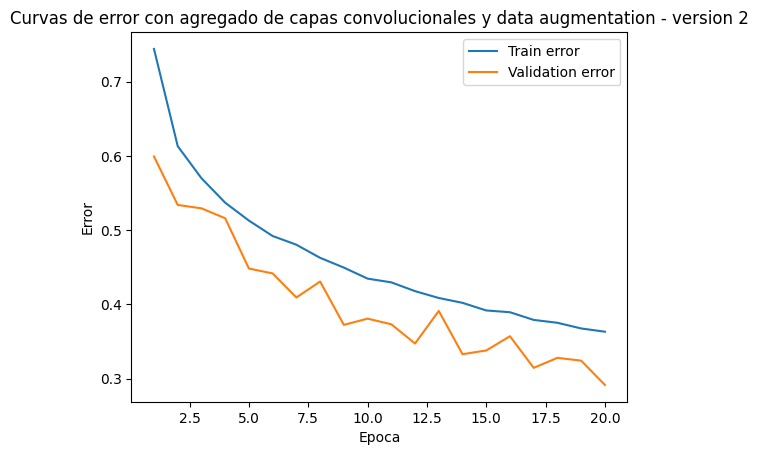

Error de test:  0    0.3057
Name: Error test, dtype: float64


In [17]:
datos_errores = pd.read_csv('metrics/errores_ej5_v2.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error con agregado de capas convolucionales y data augmentation - version 2')
error_test = pd.read_csv('metrics/error_test_ej5_v2.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

Se observa un escenario muy similar al del ejercicio 3 pero con el impacto de la mejora del diseño en el ejercicio 4. No se nota sobreajuste, pero pasamos de tener un error de test de 0.23 a 0.30, es decir, un 7% más; lo cual es bastante. Se observan además más picos en la curva de validación a comparación de la red anterior con una capa menos en data augmentation.